# **Project Name**    - Retail Sales Prediction

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Md Ismail Quraishi

# **Project Summary -**

write summary here 500-600 words

# **GitHub Link -**

https://github.com/mdismailquraishicse/capstone_project_3_regression

# **Problem Statement**

I have two dataset for this project 'Rossmann Stores Data.csv' and 'store.csv'. 'Rossmann Stores Data.csv' has 1017209 rows and 9 columns and 'store.csv' has 1115 rows and 10 columns. I have to do data analysis first for both the datasets and then merge the data after merging the data my task is to apply machine learning regression algorithm to predict the salling price.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from numpy import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Loading file(Rossmann Stores Data.csv)
# path = '/content/drive/MyDrive/Almabetter/Cohort Nilgiri/Capstone Project/Regression/'
path = 'E:/Data Science/amlabetter/Capstone Projects/REGRESSION/'
f_names = np.array(['Rossmann Stores Data.csv','store.csv'])
rossmann_df = pd.read_csv(path+f_names[0])
store_df = pd.read_csv(path+f_names[1])

### Dataset First View

In [3]:
# First view for rossmann_df
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
# First view for store_df
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
# Rows and column counts for  rossmann_df
rossmann_df.shape

(1017209, 9)

In [6]:
# Rows and column counts for  store_df
store_df.shape

(1115, 10)

### Dataset Information

In [7]:
# rossmann_df info
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# store_df info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Duplicate Values

In [9]:
# Duplicate values for rossmann_df
rossmann_df.duplicated().value_counts()

False    1017209
dtype: int64

There is no duplicate value in rossmann_df

In [10]:
# Duplicate values for store_df
store_df.duplicated().value_counts()

False    1115
dtype: int64

There is no duplicate value in store_df

#### Missing Values/Null Values

In [11]:
# function to calculate the number of null values
def null_calculator(df):
  result = {}
  for col in df.columns:
    result[col] = len(df[df[col].isna() == True])
  return result

In [12]:
# Null value count in rossmann_df
null_calculator(rossmann_df)

{'Store': 0,
 'DayOfWeek': 0,
 'Date': 0,
 'Sales': 0,
 'Customers': 0,
 'Open': 0,
 'Promo': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0}

In [13]:
# Null value count in store_df
null_calculator(store_df)

{'Store': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 3,
 'CompetitionOpenSinceMonth': 354,
 'CompetitionOpenSinceYear': 354,
 'Promo2': 0,
 'Promo2SinceWeek': 544,
 'Promo2SinceYear': 544,
 'PromoInterval': 544}

<AxesSubplot:>

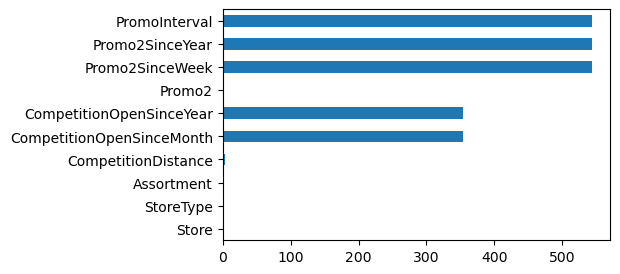

In [14]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (5,3)
pd.Series(null_calculator(store_df)).plot.barh()

### What did you know about your dataset?

I am provided with two datasets for this project 1. rossmann_df 2. store_df.

rossmann_df : It has 1017209 observations and 9 features without and duplicate and null values. Column names for the dataset are :
    <ol><li> Store
        <li>DayOfWeek
        <li>Date
        <li>Sales
        <li>Customers
        <li>Open
        <li>Promo
        <li>StateHoliday
        <li>SchoolHoliday

store_df : It has 1115 observations and 10 features without duplicate values but there are some null values. Column names and null values for each column are given below :
    <ol><li> Store
        <li>StoreType
        <li>Assortment
        <li>CompetitionDistance : 3 null values
        <li>CompetitionOpenSinceMonth : 354 null values
        <li>CompetitionOpenSinceYear : 354 null values
        <li>Promo2
        <li>Promo2SinceWeek : 544 null values
        <li>Promo2SinceYear : 544 null values
        <li>PromoInterval : 544 null values

## ***2. Understanding Your Variables***

In [15]:
# Dataset Columns for rossmann_df
rossmann_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [16]:
# Dataset Describe for rossmann_df
rossmann_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [17]:
# Dataset Columns for store_df
store_df.columns

Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [18]:
# Dataset Describe for store_df
store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000



### Variables Description 

###  rossmann_df :

<ol>
    <li>Store - Store ID
    <li>DayOfWeek - Day of the week like 1 for monday, 2 for tuesday etc...
    <li>Date - Date
    <li>Sales - Sales of the day
    <li>Customers - Number of customers
    <li>Open - Shop open or closed
    <li>Promo - Promoting or not
    <li>StateHoliday - what all states has holiday that day
    <li>SchoolHoliday - School holiday or not

###  store_df :

<ol>
    <li>Store - Store ID
    <li>StoreType - Type of store
    <li>Assortment - Type of Product
    <li>CompetitionDistance - Competition Distance
    <li>CompetitionOpenSinceMonth - competition open since month
    <li>CompetitionOpenSinceYear - competition open since year
    <li>Promo2 - Promo 2 or not
    <li>Promo2SinceWeek - Promo2 since week
    <li>Promo2SinceYear - promo2 since year
    <li>PromoInterval - Promo Interval

### Check Unique Values for each variable.

#### Unique values for rossmann_df

In [19]:
# Check Unique Values for each variable.
print(f" Number of unique values in Store is : {len(rossmann_df['Store'].unique())}")
print(f" Number of unique values in DayOfWeek is : {len(rossmann_df['DayOfWeek'].unique())}")
print(f" Number of unique values in Date is : {len(rossmann_df['Date'].unique())}")
print(f" Number of unique values in Sales is : {len(rossmann_df['Sales'].unique())}")
print(f" Number of unique values in Customers is : {len(rossmann_df['Customers'].unique())}")
print(f" Number of unique values in Open is : {len(rossmann_df['Open'].unique())}")
print(f" Number of unique values in Promo is : {len(rossmann_df['Promo'].unique())}")
print(f" Number of unique values in StateHoliday is : {len(rossmann_df['StateHoliday'].unique())}")
print(f" Number of unique values in SchoolHoliday is : {len(rossmann_df['SchoolHoliday'].unique())}")

 Number of unique values in Store is : 1115
 Number of unique values in DayOfWeek is : 7
 Number of unique values in Date is : 942
 Number of unique values in Sales is : 21734
 Number of unique values in Customers is : 4086
 Number of unique values in Open is : 2
 Number of unique values in Promo is : 2
 Number of unique values in StateHoliday is : 5
 Number of unique values in SchoolHoliday is : 2


In [20]:
print(f" Unique values in DayOfWeek are : {rossmann_df['DayOfWeek'].unique()}")
print(f" Unique values in Open are : {rossmann_df['Open'].unique()}")
print(f" Unique values in Promo are : {rossmann_df['Promo'].unique()}")
print(f" Unique values in StateHoliday are : {rossmann_df['StateHoliday'].unique()}")
print(f" Unique values in SchoolHoliday are : {rossmann_df['SchoolHoliday'].unique()}")

 Unique values in DayOfWeek are : [5 4 3 2 1 7 6]
 Unique values in Open are : [1 0]
 Unique values in Promo are : [1 0]
 Unique values in StateHoliday are : ['0' 'a' 'b' 'c' 0]
 Unique values in SchoolHoliday are : [1 0]


## 3. ***Data Wrangling***

### Data wrangling for  rossmann_df

In [21]:
# approximately 17% observations are zero
print(f"Percentage of data when shops were closed : {round(len(rossmann_df[rossmann_df['Open'] == 0])/len(rossmann_df),4)*100}.")

# Dropping the data when shops were closed.
rossmann_df = rossmann_df[rossmann_df['Open'] == 1]

Percentage of data when shops were closed : 16.99.


In [22]:
# Econding StateHoliday
# sum : '0'>0>a>b>c
# mean: b>c>a>'0'>0
print(f"Different catagories for StateHoliday : {rossmann_df.groupby(['StateHoliday'])['Sales'].mean()}")
# function for encoding the column 'StateHoliday'
def State_holiday_encoder(col):
    if col == 'c':
        return 4
    elif col == 'b':
        return 5
    elif col == 'a':
        return 3
    elif col == '0':
        return 2
    elif col == 0:
        return 1
    else:
        print('invalid')
        
# applying the  above function
rossmann_df['StateHoliday'] = rossmann_df['StateHoliday'].apply(State_holiday_encoder)

Different catagories for StateHoliday : StateHoliday
0    6701.492117
0    6992.158856
a    8487.471182
b    9887.889655
c    9743.746479
Name: Sales, dtype: float64


#### Date operations

In [23]:
# from str to date time conversion
rossmann_df['Date'] = rossmann_df['Date'].apply(lambda col: datetime.strptime(col,'%Y-%m-%d'))

In [24]:
# creating day, month, year columns
plt.rcParams['figure.figsize'] = (5,3)
rossmann_df['day'] = rossmann_df['Date'].apply(lambda d: d.day)
rossmann_df['month'] = rossmann_df['Date'].apply(lambda m: m.month)
rossmann_df['year'] = rossmann_df['Date'].apply(lambda y: y.year)

### Data wrangling for  store_df

In [25]:
# null value count
null_calculator(store_df)

{'Store': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 3,
 'CompetitionOpenSinceMonth': 354,
 'CompetitionOpenSinceYear': 354,
 'Promo2': 0,
 'Promo2SinceWeek': 544,
 'Promo2SinceYear': 544,
 'PromoInterval': 544}

In [26]:
# dropping the columns having more than 30% null values
col_tobe_dropped = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 
                    'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
store_df.drop( columns=col_tobe_dropped, inplace=True)
# dropping null values less than 1%
store_df.dropna( subset=['CompetitionDistance'], inplace= True)

### What all manipulations have you done and insights you found?

#### rossmann_df :
First of all I dropped all the rows which contains only zeros in all columns then I encoded StateHoliday so that it can be feeded to ML algorithms. After that I converted Date column from string to date time type. Further I created 3 more columns day, month, year from Date column.
#### store_df :
Here I just dropped the columns which had more than 30% null values and also deleted some rows having less than 1% null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

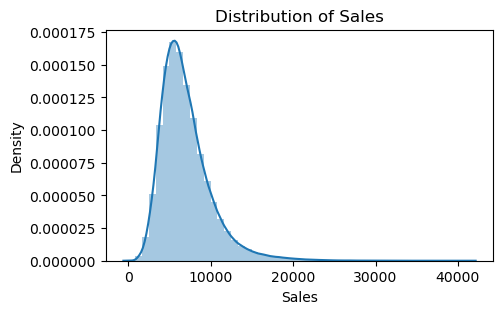

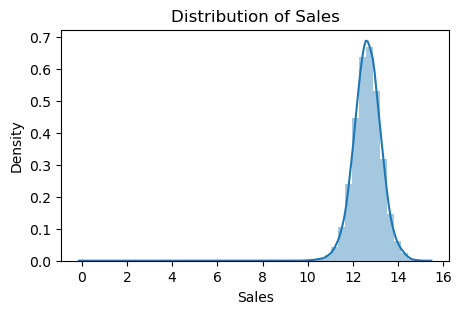

In [27]:
# Distribution plot for Sales
# Before log transformation
sns.distplot(rossmann_df['Sales'])
plt.title('Distribution of Sales')
plt.show()
print('\n')
# After log transformation
sns.distplot(np.log2(rossmann_df['Sales']+1))
plt.title('Distribution of Sales')
plt.show()

##### 1. Why did you pick the specific chart?

I picked that chart to see how the Target column is distributed.

##### 2. What is/are the insight(s) found from the chart?

Answer : From that  chart I found that the Sales column was very close to normal distribution but after log transformation I found that the distribution became more closer to Normal distribution.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Since the column is normally distributed so it will be very helpfull when ML algorithm will be applied, it will give good accuracy.

#### Chart - 2

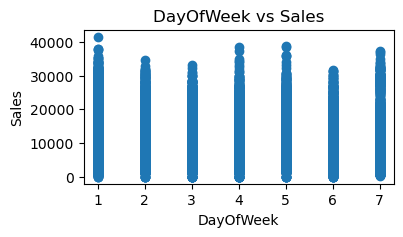

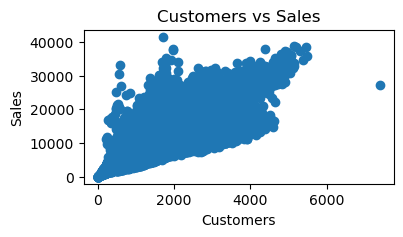

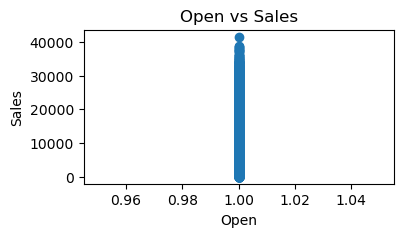

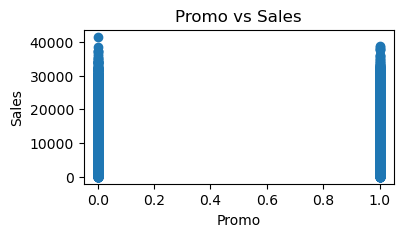

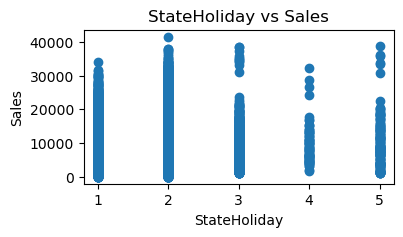

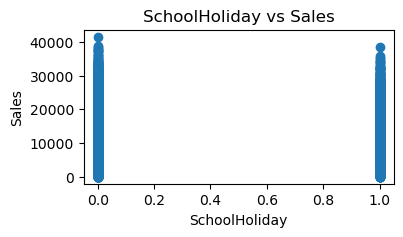

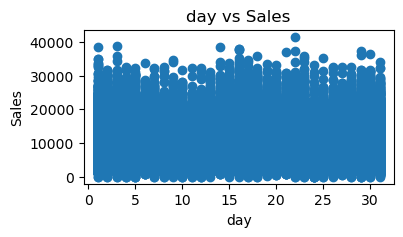

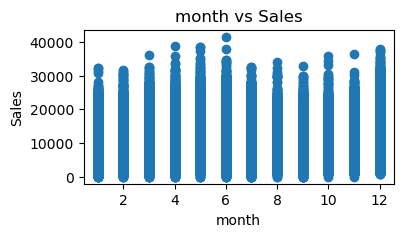

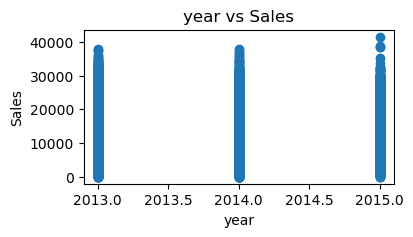

In [28]:
# Scatter plots Sales vs All Numerical columns
plt.rcParams['figure.figsize'] = (4,2)
for col in rossmann_df.describe():
    if (col == 'Sales') | (col == 'Store'):
        pass
    else:
        plt.scatter(rossmann_df[col],rossmann_df['Sales'])
        plt.title(col+' vs Sales')
        plt.xlabel(col)
        plt.ylabel('Sales')
        plt.show()

##### 1. Why did you pick the specific chart?

Answer :
    I picked these chart to see what all columns are linearly correlated with Sales column. Because for Linear regression we need columns to be linearly correlated with target column.

##### 2. What is/are the insight(s) found from the chart?

Answer : I found that only the  column Customer is linearly correlated with Sales rest of them are not linear to Sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the chart helped me to find that Customer column is very important feature for this business.<br>
There I did not see any negative growth to the business.

#### Chart - 3

Text(0, 0.5, 'Sales')

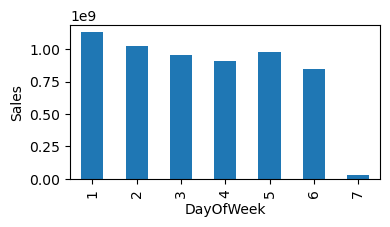

In [29]:
# Sales from day 1 to day 7
plt.rcParams['figure.figsize'] = (4,2)
rossmann_df.groupby(['DayOfWeek'])['Sales'].sum().plot.bar()
plt.ylabel('Sales')

##### 1. Why did you pick the specific chart?

Answer : I picked this chart to see what are the Sales for different days.

##### 2. What is/are the insight(s) found from the chart?

Answer : I fount that the Sale is gradually decreasing from day 1 to day 7.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. On day 7 I found that Salling is least I think it is because the shops remains closed on Sunday.<br> To earn more profit we should open the shop everyday.

#### Chart - 4

Text(0, 0.5, 'Sales')

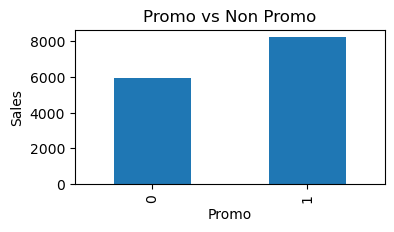

In [30]:
# Sales comparison for promotional and non promotional
rossmann_df.groupby(['Promo'])['Sales'].mean().plot.bar()
plt.title('Promo vs Non Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')

##### 1. Why did you pick the specific chart?

Answer : To see the effect of Promo on Sales.

##### 2. What is/are the insight(s) found from the chart?

Answer : I found that promo has higher sales than non promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer : Yes the insights help creating a positive business impact.<br> There is some negative insight when it is a non promo to avoid this negative impact we should avoid non promo.

#### Chart - 5

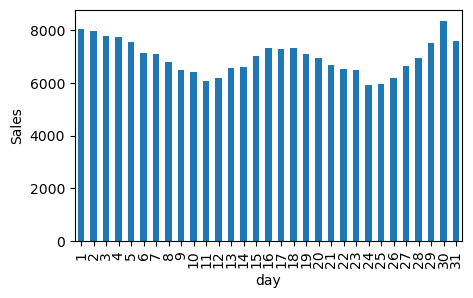

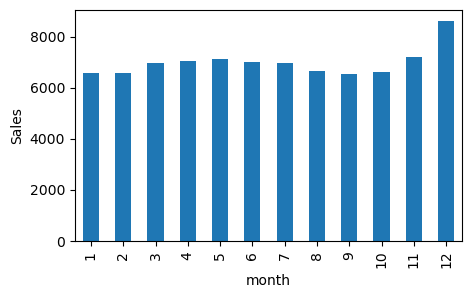

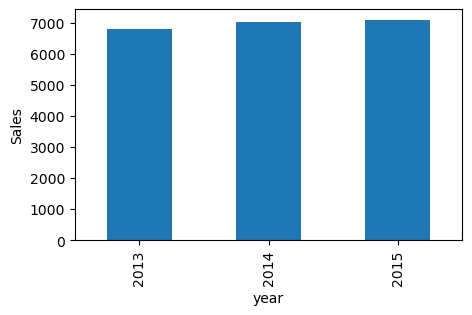

In [31]:
# looking for the patterns in a specific day, month, year
plt.rcParams['figure.figsize'] = (5,3)
rossmann_df.groupby(['day'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()
rossmann_df.groupby(['month'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()
rossmann_df.groupby(['year'])['Sales'].mean().plot.bar()
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

Answer : To see sales for each day, each month and each year

##### 2. What is/are the insight(s) found from the chart?

Answer : I did not find any helpful information from these three charts.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here. when customer is zero then Sale is also zero.

#### 2. Perform an appropriate statistical test.

In [32]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

# two more

## ***6. Feature Engineering & Data Pre-processing***

### Making new dataframe by merging rossmann_df and store_df

In [33]:
# Merging rossmann_df and store_df on the column 'Store'
final_df = rossmann_df.merge(store_df,how='left', on='Store')
final_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,2,1,31,7,2015,c,a,1270.0,0.0
1,2,5,2015-07-31,6064,625,1,1,2,1,31,7,2015,a,a,570.0,1.0
2,3,5,2015-07-31,8314,821,1,1,2,1,31,7,2015,a,a,14130.0,1.0
3,4,5,2015-07-31,13995,1498,1,1,2,1,31,7,2015,c,c,620.0,0.0
4,5,5,2015-07-31,4822,559,1,1,2,1,31,7,2015,a,a,29910.0,0.0


In [34]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 844391
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Store                844392 non-null  int64         
 1   DayOfWeek            844392 non-null  int64         
 2   Date                 844392 non-null  datetime64[ns]
 3   Sales                844392 non-null  int64         
 4   Customers            844392 non-null  int64         
 5   Open                 844392 non-null  int64         
 6   Promo                844392 non-null  int64         
 7   StateHoliday         844392 non-null  int64         
 8   SchoolHoliday        844392 non-null  int64         
 9   day                  844392 non-null  int64         
 10  month                844392 non-null  int64         
 11  year                 844392 non-null  int64         
 12  StoreType            842206 non-null  object        
 13  Assortment    

In [35]:
# null values in final_df
missing_val = null_calculator(final_df)
for missing in missing_val.keys():
    print(f"{missing} : {round(missing_val[missing]/len(final_df),4)}")

Store : 0.0
DayOfWeek : 0.0
Date : 0.0
Sales : 0.0
Customers : 0.0
Open : 0.0
Promo : 0.0
StateHoliday : 0.0
SchoolHoliday : 0.0
day : 0.0
month : 0.0
year : 0.0
StoreType : 0.0026
Assortment : 0.0026
CompetitionDistance : 0.0026
Promo2 : 0.0026


There are just less than 1% null values in the final_df dataset so I decided to drop the null values.

### 1. Handling Missing Values

In [36]:
# Dropping null values
final_df = final_df.dropna()
null_calculator(final_df)

{'Store': 0,
 'DayOfWeek': 0,
 'Date': 0,
 'Sales': 0,
 'Customers': 0,
 'Open': 0,
 'Promo': 0,
 'StateHoliday': 0,
 'SchoolHoliday': 0,
 'day': 0,
 'month': 0,
 'year': 0,
 'StoreType': 0,
 'Assortment': 0,
 'CompetitionDistance': 0,
 'Promo2': 0}

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer : I simply dropped the missing values because there was only few observations containing missing values but when I was doing data wrangling I also dropped some columns which were containing more than 30% null values I thought we already lost 30% information about those columns so I dropped the columns.

### 2. Handling Outliers

<AxesSubplot:>

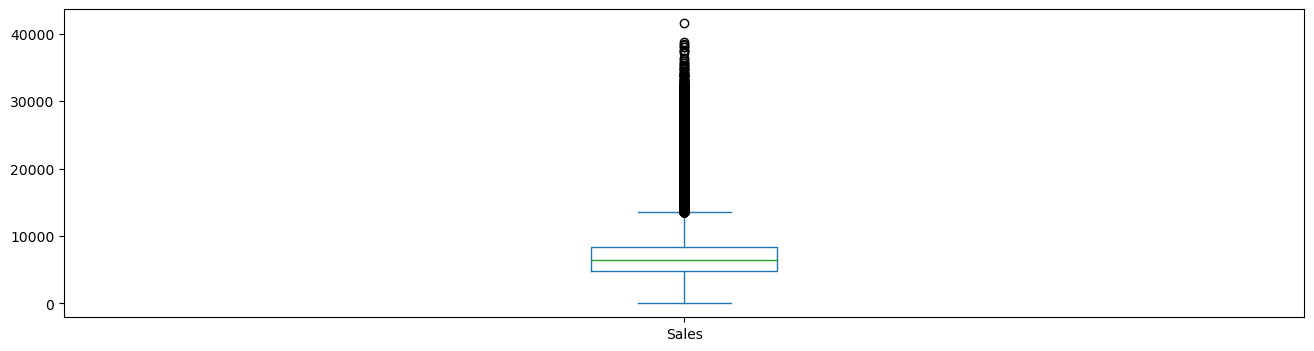

In [37]:
# Handling Outliers & Outlier treatments
plt.rcParams['figure.figsize'] = (16,4)
final_df['Sales'].plot.box()

In [38]:
# Shop is opened but sale is zero
final_df[final_df['Sales'] == 0].head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year,StoreType,Assortment,CompetitionDistance,Promo2
73090,971,5,2015-05-15,0,0,1,0,2,1,15,5,2015,c,a,1140.0,1.0
116587,674,4,2015-03-26,0,0,1,0,2,0,26,3,2015,a,a,2640.0,1.0
163494,699,4,2015-02-05,0,0,1,1,2,0,5,2,2015,a,a,180.0,1.0
266468,708,3,2014-10-01,0,0,1,1,2,0,1,10,2014,c,c,11470.0,1.0
273680,357,1,2014-09-22,0,0,1,0,1,0,22,9,2014,a,a,2060.0,0.0


There are some case when shop is opened but sale is zero so these observations are outliers therefore I decided to drop these values.

In [39]:
# Dropping outliers where Sales = 0
final_df = final_df[final_df['Sales'] != 0]
final_df.shape

(842152, 16)

In [40]:
# Single variate outlier detection
q1 = final_df['Sales'].quantile(.25)
q3 = final_df['Sales'].quantile(.75)
iqr = q3-q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
final_df = final_df[(final_df['Sales'] <= upper) & (final_df['Sales'] >= lower)]
final_df.shape

(811408, 16)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer : I dropped outlier by using q1-1.5*iqr and q3+1.5*iqr technique and also removed values where Sales =0.
after dropping catogorical values I will apply Isolation forest to drop the outliers because this algorithm is not working with data and catogorical columns like a,b,c,d.

### 3. Categorical Encoding

In [41]:
# one hot encoding for Assortment and StoreType columns
final_df['AssortmentA'] = final_df['Assortment'].apply(lambda data: 1 if data == 'a' else 0)
final_df['AssortmentB'] = final_df['Assortment'].apply(lambda data: 1 if data == 'b' else 0)
final_df['AssortmentC'] = final_df['Assortment'].apply(lambda data: 1 if data == 'c' else 0)

final_df['StoreTypeA'] = final_df['StoreType'].apply(lambda data: 1 if data == 'a' else 0)
final_df['StoreTypeB'] = final_df['StoreType'].apply(lambda data: 1 if data == 'b' else 0)
final_df['StoreTypeC'] = final_df['StoreType'].apply(lambda data: 1 if data == 'c' else 0)
final_df['StoreTypeD'] = final_df['StoreType'].apply(lambda data: 1 if data == 'd' else 0)

final_df.drop(columns =['Assortment', 'StoreType'], inplace= True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer : I did one hot encoding for the columns Assortment and StoreType for the catagories a,b,c,d.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [42]:
# Dropping the columns which are not required for ML algorithm
final_df.drop( columns=['Open', 'Store','Date', 'day', 'month', 'year'],inplace= True)

#### 2. Feature Selection

<AxesSubplot:>

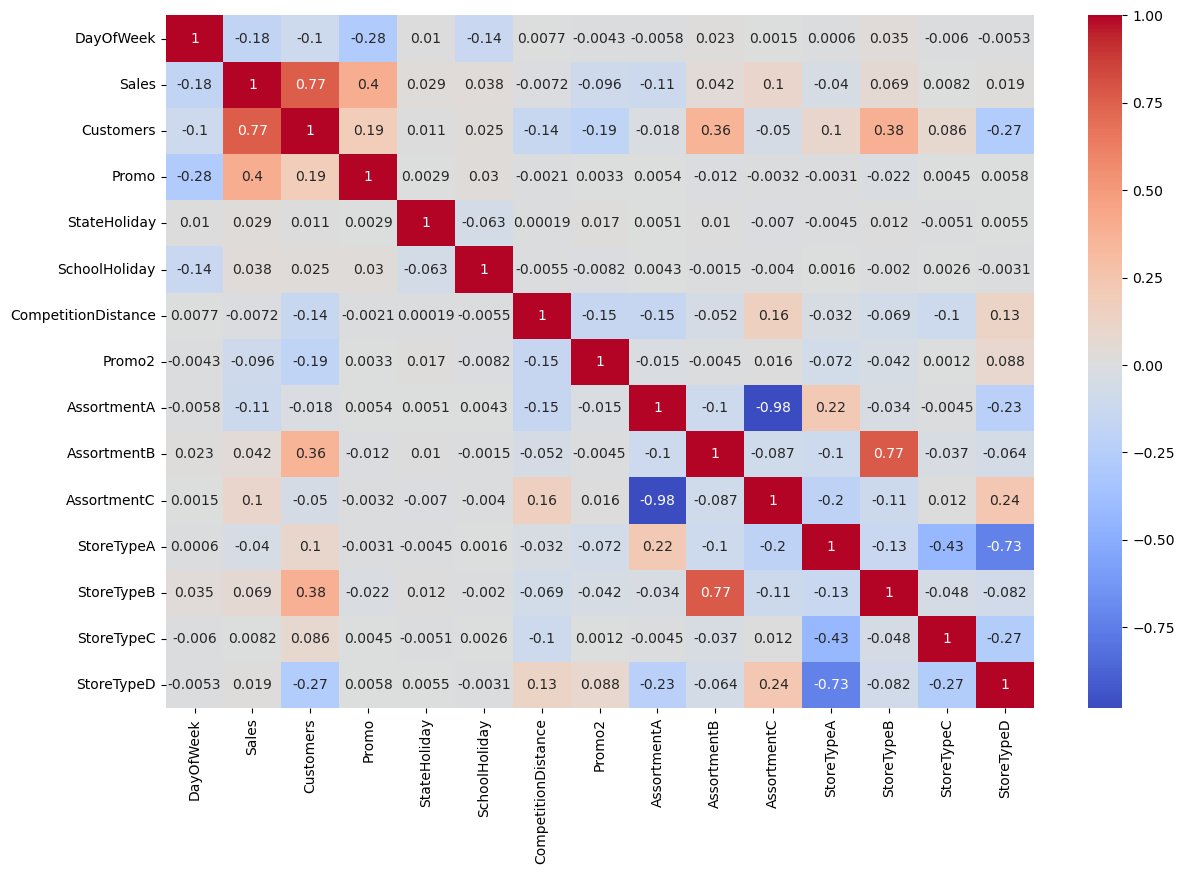

In [43]:
# correlation visualization
plt.rcParams['figure.figsize'] = (14,9)
# drop_cols = ['StoreTypeA','AssortmentC','StateHoliday']
# corr = final_df.drop( columns= drop_cols).corr()
corr = final_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [44]:
#Multicollinearity
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [45]:
# Multicolinearitiy check
high_vif_col = ['StateHoliday','AssortmentB','StoreTypeA','StateHoliday','AssortmentC','Sales']
calc_vif(final_df[[i for i in final_df.describe().columns if i not in high_vif_col ]])

,variables,VIF
0,DayOfWeek,4.014274
1,Customers,4.998387
2,Promo,1.947880
3,SchoolHoliday,1.230663
4,CompetitionDistance,1.489119
5,Promo2,1.910575
6,AssortmentA,2.037667
7,StoreTypeB,1.175193
8,StoreTypeC,1.244902
9,StoreTypeD,1.578652


In [46]:
# Columns to keep for ML
col_to_keep = ['DayOfWeek','Customers','Promo','SchoolHoliday','CompetitionDistance','Promo2',\
               'AssortmentA','StoreTypeB','StoreTypeC','StoreTypeD']

<AxesSubplot:>

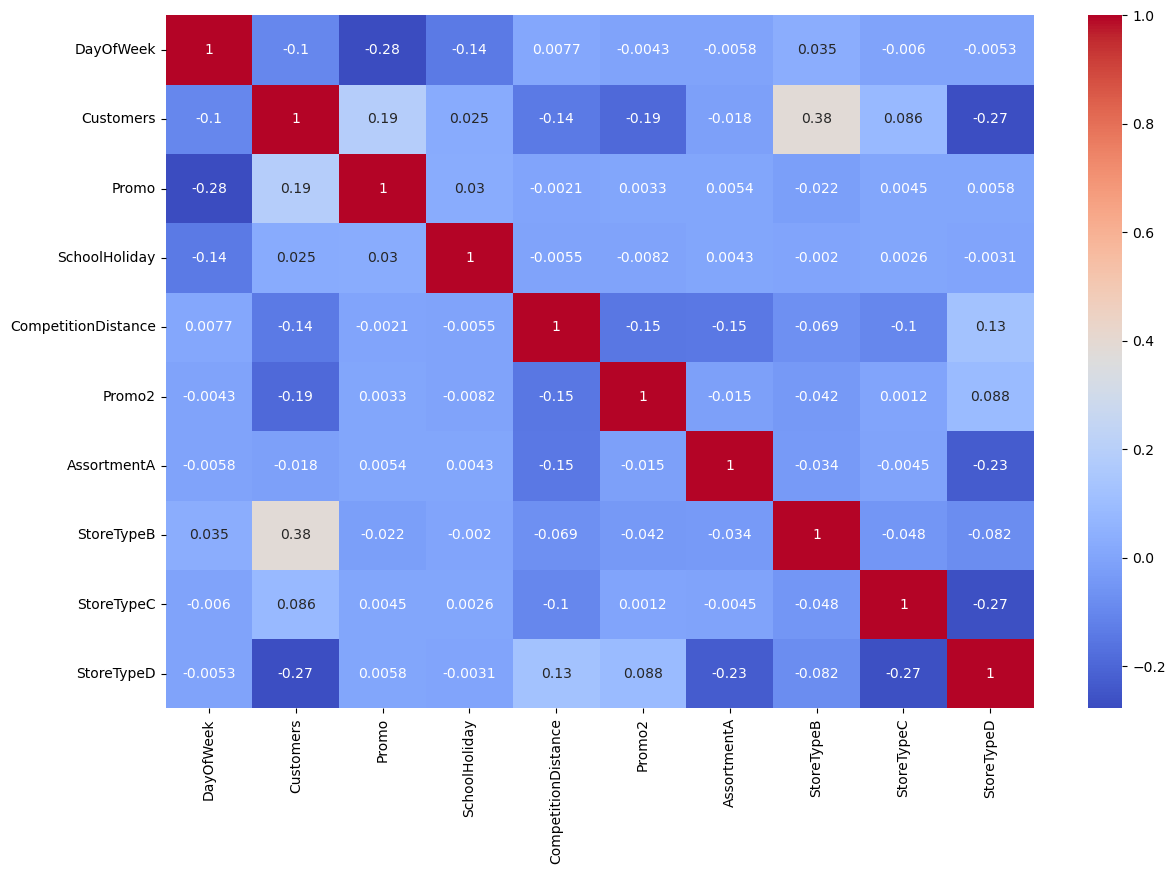

In [47]:
# correlation visualization after selecting the features
plt.rcParams['figure.figsize'] = (14,9)
# drop_cols = ['StoreTypeA','AssortmentC','StateHoliday']
# corr = final_df.drop( columns= drop_cols).corr()
corr = final_df[col_to_keep].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

##### What all feature selection methods have you used  and why?

This is the list of features what I selected :
               <ol>
               <li>DayOfWeek
               <li>Customers
               <li>Promo
               <li>SchoolHoliday
               <li>CompetitionDistance
               <li>Promo2
               <li>AssortmentA
               <li>StoreTypeB
               <li>StoreTypeC
               <li>StoreTypeD
                   
I selected these features because of very low vif scores and they are very less multi colinear with independent variables.

##### Which all features you found important and why?

Answer : 

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

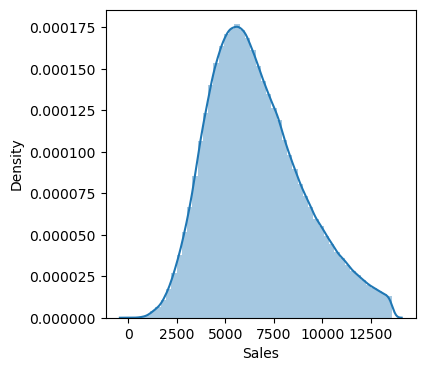

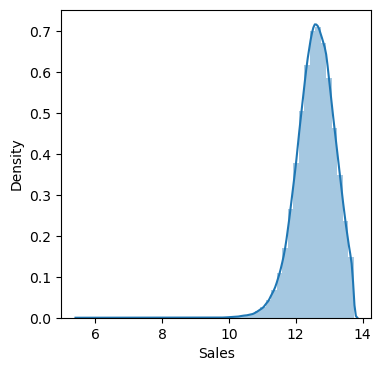

In [48]:
# Distribution of the data before and after log transformation
plt.rcParams['figure.figsize'] = (4,4)
sns.distplot(final_df['Sales'])
plt.show()
sns.distplot(np.log2(final_df['Sales']))
plt.show()

Answer : I think my data does not need to be transformed because after transformation left tell is becomming more longer.

### 6. Data Scaling

In [49]:
scaled_array = MinMaxScaler().fit_transform(final_df[['Customers','CompetitionDistance']])
final_df['Customers'] = scaled_array[:,0]
final_df['CompetitionDistance'] = scaled_array[:,1]

In [50]:
X = final_df[col_to_keep].values
y = final_df['Sales']

In [51]:
# Importing modules for preprocessing
# X = MinMaxScaler().fit_transform(final_df[col_to_keep].values)
# Y = final_df['Sales'].values

##### Which method have you used to scale you data and why?

I am using MinMax Scaler method to scale the data because my data does not follow gaussian distribution except Sales and Customers.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes dimention reduction is needed to avoid less important variables. And to select only those features which are most important.

In [52]:
from sklearn.decomposition import PCA
pca = PCA(random_state=0)
X = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.70529826, 0.07058533, 0.05902358, 0.05369797, 0.04499992,
       0.03621109, 0.02337668, 0.00366362, 0.00232764, 0.00081591])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used PCA technique to reduce the dimention of the data to select most important features. Here I selected only 7 features because rest 3 were not explaining the variance more than 1%.

### 8. Data Splitting

In [53]:
# train test split
xtrain, xtest, ytrain,ytest = train_test_split(X,y,random_state=0,test_size=.20)

##### What data splitting ratio have you used and why? 

Answer : I choosed 80% data to train the model and 20% for testing because size of the data is approximatly 8 lacs and more the training data is better to train a good model.

### 9. Handling Imbalanced Dataset

There is no imbalanced data because this is not a classification problem.

## ***7. ML Model Implementation***

### ML Model - 1

In [54]:
# fitting linear model
linear_simple_model = LinearRegression()
linear_simple_model.fit(xtrain,ytrain)

LinearRegression()

In [55]:
# Coefficients for the model
linear_simple_model.coef_

array([ -262.10794657,   218.36185946,   611.5265094 ,  1882.39877061,
         308.19001828,   152.65189523,   -60.51488693,  3492.79989532,
       -1036.21009885, 30290.0988324 ])

In [56]:
# Predicting for test and train
pred_train = linear_simple_model.predict(xtrain)
pred_test = linear_simple_model.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

Answer : As a first model I am using simple Linear Regression model and here I found that r2 score for train is 887 and for test is 883 which are nearly equal and RMSE for train is 810.18 and for test is 826.67 which is also nearly equal so we can say that model is not overfitted.

R2_score train : 0.7630940512544067
R2_score test : 0.7627766576171768


<AxesSubplot:>

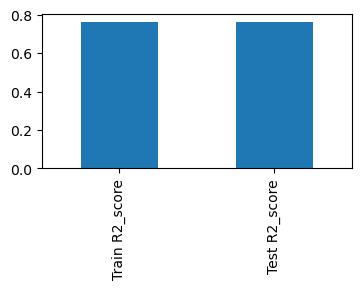

In [57]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 1177.3851221955633
Root mean squared error test : 1181.2908403472213


<AxesSubplot:>

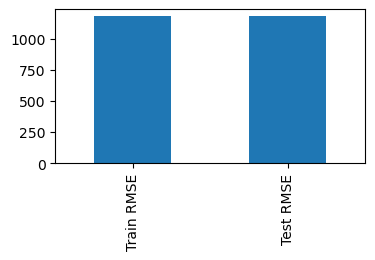

In [58]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

## Cross validation for Linear Regression

In [59]:
# cross validation fitting
mdl = LinearRegression()
grid_param = {'fit_intercept': [True,False],'positive': [True,False]}
grid_model = GridSearchCV(mdl,cv=10, param_grid = grid_param,verbose=2)
grid_model.fit(xtrain,ytrain)
print(grid_model.best_params_)
model = grid_model.best_estimator_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.3s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END ..................fit_intercept=True, positive=True; total time=   0.2s
[CV] END .................fit_intercept=True, positive=False; total time=   0.2s
[CV] END .................fit_intercept=True, po

##### Which hyperparameter optimization technique have you used and why?

Answer Here. For this model the parameters I am taking  are fit_intercept, and positive to check which one gives better result.

In [60]:
# Coefficients for the model
model.coef_
# mdl = LinearRegression()
# mdl.get_params()

array([ -262.10794657,   218.36185946,   611.5265094 ,  1882.39877061,
         308.19001828,   152.65189523,   -60.51488693,  3492.79989532,
       -1036.21009885, 30290.0988324 ])

In [61]:
# Predicting for test and train
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here. I did not see any improvement after applying cross validation on Linear Regression.

R2_score train : 0.7630940512544067
R2_score test : 0.7627766576171768


<AxesSubplot:>

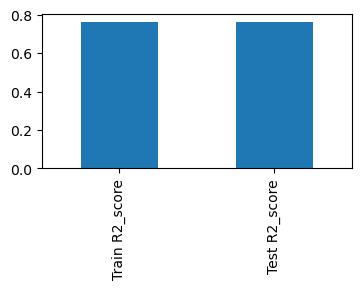

In [62]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 1177.3851221955633
Root mean squared error test : 1181.2908403472213


<AxesSubplot:>

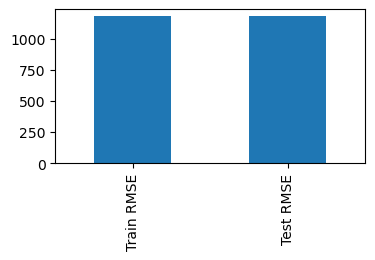

In [63]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

### ML Model - 2

#### Decision Tree

In [64]:
# Fitting decission tree regressor
dtr_model = DecisionTreeRegressor(max_depth=11)
dtr_model.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=11)

In [65]:
# Predicting for test and train
pred_train = dtr_model.predict(xtrain)
pred_test = dtr_model.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

r2_score is slightly better than Linear Regression. The model was overfitted earlier but after limit the max depth of the tree the model is working well.

Answer : Decision tree is giving lower error than linear regression .

R2_score train : 0.8468879178813129
R2_score test : 0.8421402877773139


<AxesSubplot:>

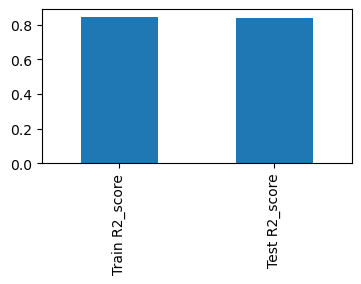

In [66]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 946.5319798679878
Root mean squared error test : 963.6376936861989


<AxesSubplot:>

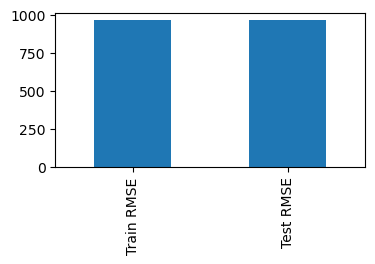

In [67]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# cross validation
dtr_model = DecisionTreeRegressor()
grid_params = {'max_depth' : [13],'random_state':[1], 'min_samples_leaf': [4]}
grid_model = GridSearchCV(estimator=dtr_model,cv= 3, param_grid=grid_params, verbose=2)
grid_model.fit(xtrain,ytrain)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ...max_depth=13, min_samples_leaf=4, random_state=1; total time=   6.2s
[CV] END ...max_depth=13, min_samples_leaf=4, random_state=1; total time=   7.5s
[CV] END ...max_depth=13, min_samples_leaf=4, random_state=1; total time=   6.7s


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [13], 'min_samples_leaf': [4],
                         'random_state': [1]},
             verbose=2)

In [69]:
# best parameters
grid_model.best_params_

{'max_depth': 13, 'min_samples_leaf': 4, 'random_state': 1}

In [70]:
# best model
best_model = grid_model.best_estimator_

In [71]:
# Predicting for test and train
pred_train = best_model.predict(xtrain)
pred_test = best_model.predict(xtest)

##### Which hyperparameter optimization technique have you used and why?

Answer Here. I am max_depth to limit the growth of tree , min_samples_leaf to avoid overfitting and random_state to get same result each time.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer : r2_score slightly increased and RMSE decreased after applying cross validation.

R2_score train : 0.8676222295453799
R2_score test : 0.8571893209717455


<AxesSubplot:>

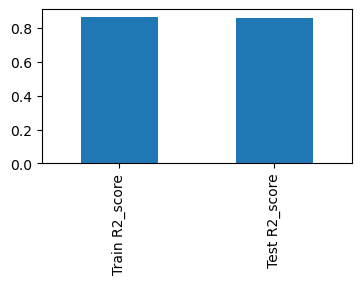

In [72]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 880.11230250566
Root mean squared error test : 916.5548676652634


<AxesSubplot:>

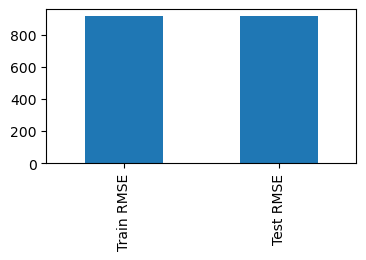

In [73]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

### ML Model - 3

#### XGBoost regressor

In [74]:
# XGBoost regressor fitting
xgb_model = XGBRegressor()
xgb_model.fit(xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [75]:
# Predicting for test and train
pred_train = xgb_model.predict(xtrain)
pred_test = xgb_model.predict(xtest)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

This model is giving better r2 score than Decision tree and Linear regression

This model is giving lower RMSE than Decision tree and Linear regression.

R2_score train : 0.8885185620766062
R2_score test : 0.8848778535350327


<AxesSubplot:>

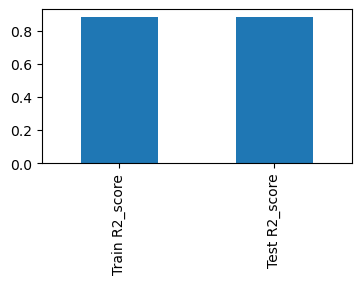

In [76]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 807.666075378319
Root mean squared error test : 822.9199014324743


<AxesSubplot:>

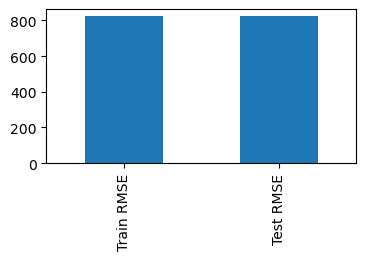

In [77]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
xgb_model = XGBRegressor()
grid_params = {'learning_rate':[.3,.7,.9],'random_state' :[0],'n_estimators': [80]}
grid_model = GridSearchCV(estimator=xgb_model,cv= 3, param_grid=grid_params, verbose=2)
grid_model.fit(xtrain,ytrain)
model = grid_model.best_estimator_

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .learning_rate=0.3, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.3, n_estimators=80, random_state=0; total time= 1.0min
[CV] END .learning_rate=0.3, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.7, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.7, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.7, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.9, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.9, n_estimators=80, random_state=0; total time= 1.1min
[CV] END .learning_rate=0.9, n_estimators=80, random_state=0; total time= 1.1min


In [79]:
grid_model.best_params_

{'learning_rate': 0.7, 'n_estimators': 80, 'random_state': 0}

In [80]:
# Predicting for test and train
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

##### Which hyperparameter optimization technique have you used and why?

Answer : I am taking learning_rate and n_estimators as  parameters to tune  the model because by controlling learning_rate we can overcome on the problem of overshooting and avoid to stuck in local minimum and n_estimators is helpful to get more accurate prediction.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer : r2_score slightly increased after applying cross validation.

Answer : RMSE slightly decreaded after applying cross validation.

R2_score train : 0.8929564433222813
R2_score test : 0.8863953507499316


<AxesSubplot:>

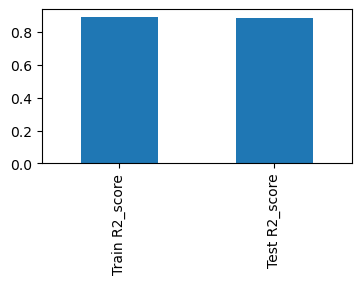

In [81]:
# R2 score for train and test
plt.rcParams['figure.figsize'] = (4,2)
print(f"R2_score train : {r2_score(ytrain,pred_train)}")
print(f"R2_score test : {r2_score(ytest,pred_test)}")
pd.Series([r2_score(ytrain,pred_train),r2_score(ytest,pred_test)], index=['Train R2_score', 'Test R2_score']).plot.bar()

Root mean squared error train : 791.426933609254
Root mean squared error test : 817.4781976468419


<AxesSubplot:>

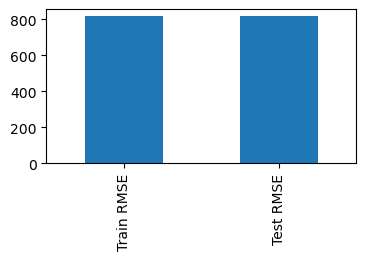

In [82]:
# mean squared for train and test
print(f"Root mean squared error train : {np.math.sqrt(mean_squared_error(ytrain,pred_train))}")
print(f"Root mean squared error test : {np.math.sqrt(mean_squared_error(ytest,pred_test))}")
pd.Series([np.math.sqrt(mean_squared_error(ytest,pred_test)),np.math.sqrt(mean_squared_error(ytest,pred_test))], index=['Train RMSE', 'Test RMSE']).plot.bar()

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [85]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [86]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***